
In this notebook, You will do amazon review classification with BERT.[Download data from [this](https://www.kaggle.com/snap/amazon-fine-food-reviews/data) link]
<pre> 
It contains 5 parts as below.  Detailed instrctions are given in the each cell. please read every comment we have written. 
    1. Preprocessing 
    2. Creating a BERT model from the Tensorflow HUB.
    3. Tokenization
    4. getting the pretrained embedding Vector for a given review from the BERT.
    5. Using the embedding data apply NN and classify the reviews.
    6. Creating a Data pipeline for BERT Model. 

<font size=5>instructions:</font>

    1. Don't change any Grader Functions. Don't manipulate any Grader functions. 
    If you manipulate any, it will be considered as plagiarised. 
    
    2. Please read the instructions on the code cells and markdown cells. We will explain what to write. 
    
    3. please return outputs in the same format what we asked. Eg. Don't return List if we are asking for a numpy array.
    
    4. Please read the external links that we are given so that you will learn the concept behind the code that you are writing.
    
    5. We are giving instructions at each section if necessary, please follow them. 

<font size=5>Every Grader function has to return True. </font>
</pre>

In [ ]:
#in this assignment you need two files reviews.csv and tokenization file
#you can use gdown module to import both the files in colab from Google drive
#the syntax is for gdown is !gdown --id file_id
#please run the below cell to import the required files


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown --id 13exfXiyiByluh1PfYK1EyZyizqxeCVG9

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=13exfXiyiByluh1PfYK1EyZyizqxeCVG9
To: /content/tokenization.py
100% 17.3k/17.3k [00:00<00:00, 22.4MB/s]


In [2]:
#all imports
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Model

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

<font size=4>Grader function 1 </font>

In [ ]:
def grader_tf_version():
    assert((tf.__version__)>'2')
    return True
grader_tf_version()

True

<pre><font size=6>Part-1: Preprocessing</font></pre>

In [ ]:
#Read the dataset - Amazon fine food reviews
reviews = pd.read_csv(r"/content/drive/MyDrive/Kaggle/Reviews.csv")
#check the info of the dataset
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
#get only 2 columns - Text, Score
#drop the NAN values
reviews=reviews.drop(columns=['Id','ProductId','UserId','ProfileName','HelpfulnessDenominator','HelpfulnessNumerator','Summary','Time'],axis=1)

In [ ]:
reviews.head()
len(reviews)

568454

In [ ]:
reviews=reviews.dropna()
len(reviews)

568454

In [ ]:
#if score> 3, set score = 1
#if score<=2, set score = 0
#if score == 3, remove the rows. 
reviews.drop(reviews[reviews['Score'] == 3].index, inplace = True)

In [ ]:
len(reviews)

525814

In [ ]:
new_scores=[]
for i in range(len(reviews)):
  if reviews['Score'].values[i]<3:
    new_scores.append(0)
  else:
    new_scores.append(1)

In [ ]:
len(new_scores)

525814

In [ ]:
reviews['Score']=new_scores

<font size=4>Grader function 2 </font>

In [ ]:
def grader_reviews():
    temp_shape = (reviews.shape == (525814, 2)) and (reviews.Score.value_counts()[1]==443777)
    assert(temp_shape == True)
    return True
grader_reviews()

True

In [ ]:
def get_wordlen(x):
    return len(x.split())
reviews['len'] = reviews.Text.apply(get_wordlen)
reviews = reviews[reviews.len<50]
reviews = reviews.sample(n=100000, random_state=30)

In [3]:
import re

In [ ]:
#remove HTML from the Text column and save in the Text column only
cleaned_text=[]
for i in reviews['Text']:
  i=i.lower()
  i=re.sub(r'<.*?>',' ',i)
  cleaned_text.append(i)

In [ ]:
reviews['Text']=cleaned_text

In [ ]:
#print head 5
reviews.head()

,Score,Text,len
64117,1,the tea was of great quality and it tasted lik...,30
418112,1,my cat loves this. the pellets are nice and s...,31
357829,1,great product. does not completely get rid of ...,41
175872,1,this gum is my favorite! i would advise every...,27
178716,1,i also found out about this product because of...,22


In [ ]:
reviews=pd.read_csv('/content/drive/MyDrive/Kaggle/preprocessed.csv')

In [ ]:
#split the data into train and test data(20%) with Stratify sampling, random state 33, 
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(reviews['Text'],reviews['Score'],test_size=0.2,stratify=reviews['Score'],random_state=33)

In [ ]:
y_tr.head()

25426    1
98503    1
60439    1
78009    1
43615    1
Name: Score, dtype: int64

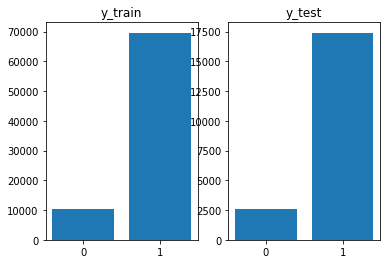

In [ ]:
#plot bar graphs of y_train and y_test
import matplotlib.pyplot as plt
plt.subplot(121)
plt.bar(['0','1'],[y_tr.value_counts()[0],y_tr.value_counts()[1]])
plt.title('y_train')
plt.subplot(122)
plt.bar(['0','1'],[y_te.value_counts()[0],y_te.value_counts()[1]])
plt.title('y_test')
plt.show()

In [ ]:
#saving to disk. if we need, we can load preprocessed data directly. 
#reviews.to_csv('/content/drive/MyDrive/Kaggle/preprocessed.csv', index=False)

<pre><font size=6>Part-2: Creating BERT Model</font> 

If you want to know more about BERT, You can watch live sessions on Transformers and BERt. 
we will strongly recommend you to read <a href="https://jalammar.github.io/illustrated-transformer/">Transformers</a>, <a href="https://arxiv.org/abs/1810.04805">BERT Paper</a> and, <a href="https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/">This blog</a>.


For this assignment, we are using <a href="https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1">BERT uncased Base model</a>. 
It uses L=12 hidden layers (i.e., Transformer blocks), a hidden size of H=768, and A=12 attention heads. </pre>

In [4]:
## Loading the Pretrained Model from tensorflow HUB
tf.keras.backend.clear_session()

# maximum length of a seq in the data we have, for now i am making it as 55. You can change this
max_seq_length = 55

#BERT takes 3 inputs

#this is input words. Sequence of words represented as integers
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")

#mask vector if you are padding anything
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")

#segment vectors. If you are giving only one sentence for the classification, total seg vector is 0. 
#If you are giving two sentenced with [sep] token separated, first seq segment vectors are zeros and 
#second seq segment vector are 1's
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")

#bert layer 
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

#Bert model
#We are using only pooled output not sequence out. 
#If you want to know about those, please read https://www.kaggle.com/questions-and-answers/86510
bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=pooled_output)


In [5]:
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 55)]         0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 55)]         0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 55)]         0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 55, 768)]                 'input_mask[0][0]',         

In [ ]:
bert_model.output

<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer')>

<pre><font size=6>Part-3: Tokenization</font></pre>

In [ ]:
#getting Vocab file
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()

In [ ]:
!pip install bert-for-tf2
import bert
BertTokenizer = bert.bert_tokenization.FullTokenizer
tokenizer = BertTokenizer(vocab_file, do_lower_case)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 146 kB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30535 sha256=f508574ad25812244410e6a77cdf28116017c63c5d4f297fb9e87bca08f9d312
  Stored in directory: /root/.cache/pip/wheels/47/b6/e5/8c76ec779f54bc5c2f1b57d2200bb9c77616da83873e8acb53
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19472 sha256=fa49cde36a4e3c28869982c0cd5ad6d70d30af1af3b99f26fabdeea4362d6e4f
  Stored in directory: /root/.cache/pip/wheels/0e/fc/d2/a44fff33af0f233d7def6e7de413006d57c10e10ad736fe8f5
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7911 sha256=4df0f26d95e1b22c293d3a47c4b692b01581ee8a6416b6650f00e0af921e02e6
  Stored in directory: /root/.cache/pip/wheels/e1/11/67/33cc51bbee127cb8fb2ba549cd29109b2f22da43ddf9969716
Successfully built bert-for-tf2 params-flow p

In [ ]:
#import tokenization  #We have given tokenization.py file

In [ ]:
# Create tokenizer " Instantiate FullTokenizer" 
# name must be "tokenizer"
# the FullTokenizer takes two parameters 1. vocab_file and 2. do_lower_case 
# we have created these in the above cell ex: FullTokenizer(vocab_file, do_lower_case )
# please check the "tokenization.py" file the complete implementation


In [ ]:
# if you are getting error for sentencepiece module you can install it using below command while running this cell for the first time
#!pip install sentencepiece
#tokenizer=tokenization.FullTokenizer(vocab_file,do_lower_case )

<font size=4>Grader function 3 </font>

In [ ]:
#it has to give no error 
def grader_tokenize(tokenizer):
    out = False
    try:
        out=('[CLS]' in tokenizer.vocab) and ('[SEP]' in tokenizer.vocab)
    except:
        out = False
    assert(out==True)
    return out
grader_tokenize(tokenizer)

True

In [6]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# Create train and test tokens (X_train_tokens, X_test_tokens) from (X_train, X_test) using Tokenizer and 
# add '[CLS]' at start of the Tokens and '[SEP]' at the end of the tokens. 
max_len=55
X_train_tokens=[tokenizer.tokenize(sentence) for sentence in x_tr.values]
X_test_tokens=[tokenizer.tokenize(sentence) for sentence in x_te.values]
#x_tr = ["[CLS] " + sentence + " [SEP]" for sentence in x_tr.values]
#x_te = ["[CLS] " + sentence + " [SEP]" for sentence in x_te.values]
# maximum number of tokens is 55(We already given this to BERT layer above) so shape is (None, 55)
# if it is less than 55, add '[PAD]' token else truncate the tokens length.(similar to padding)
for i in range(len(X_train_tokens)):
  if len(X_train_tokens[i])>(max_len-2):
    X_train_tokens[i]=['[CLS]']+X_train_tokens[i][0:max_len-2]+['[SEP]']
  else:
    X_train_tokens[i]=['[CLS]']+X_train_tokens[i]+['[SEP]']
for i in range(len(X_test_tokens)):
  if len(X_test_tokens[i])>(max_len-2):
    X_test_tokens[i]=['[CLS]']+X_test_tokens[i][0:max_len-2]+['[SEP]']
  else:
    X_test_tokens[i]=['[CLS]']+X_test_tokens[i]+['[SEP]']    
#X_train_tokens=[['[CLS]']+i[0:max_len-2]+['[SEP]'] for i in X_train_tokens]
#X_test_tokens=X_test_tokens=[['[CLS]']+i[0:max_len-2]+['[SEP]'] for i in X_test_tokens]
X_train_tokens=[tokenizer.convert_tokens_to_ids(i) for i in X_train_tokens]
X_test_tokens=[tokenizer.convert_tokens_to_ids(i) for i in X_test_tokens]
X_train_tokens=pad_sequences(X_train_tokens,maxlen=max_len,padding='post',truncating='post')
X_test_tokens=pad_sequences(X_test_tokens,maxlen=max_len,padding='post',truncating='post')
# Based on padding, create the mask for Train and Test ( 1 for real token, 0 for '[PAD]'), 
# it will also same shape as input tokens (None, 55) save those in X_train_mask, X_test_mask
X_train_mask=[]
X_test_mask=[]
for seq in X_train_tokens:
  seq_mask = [float(i>0) for i in seq]
  X_train_mask.append(seq_mask)
for seq in X_test_tokens:
  seq_mask = [float(i>0) for i in seq]
  X_test_mask.append(seq_mask)
X_train_mask=np.array(X_train_mask)
X_test_mask=np.array(X_test_mask)  
# Create a segment input for train and test. We are using only one sentence so all zeros. This shape will also (None, 55)
X_train_segment=np.zeros(shape=X_train_tokens.shape)
X_test_segment=np.zeros(shape=X_test_tokens.shape)
# type of all the above arrays should be numpy arrays

# after execution of this cell, you have to get 
# X_train_tokens, X_train_mask, X_train_segment
# X_test_tokens, X_test_mask, X_test_segment

'max_len=55\nX_train_tokens=[tokenizer.tokenize(sentence) for sentence in x_tr.values]\nX_test_tokens=[tokenizer.tokenize(sentence) for sentence in x_te.values]\n#x_tr = ["[CLS] " + sentence + " [SEP]" for sentence in x_tr.values]\n#x_te = ["[CLS] " + sentence + " [SEP]" for sentence in x_te.values]\n# maximum number of tokens is 55(We already given this to BERT layer above) so shape is (None, 55)\n# if it is less than 55, add \'[PAD]\' token else truncate the tokens length.(similar to padding)\nfor i in range(len(X_train_tokens)):\n  if len(X_train_tokens[i])>(max_len-2):\n    X_train_tokens[i]=[\'[CLS]\']+X_train_tokens[i][0:max_len-2]+[\'[SEP]\']\n  else:\n    X_train_tokens[i]=[\'[CLS]\']+X_train_tokens[i]+[\'[SEP]\']\nfor i in range(len(X_test_tokens)):\n  if len(X_test_tokens[i])>(max_len-2):\n    X_test_tokens[i]=[\'[CLS]\']+X_test_tokens[i][0:max_len-2]+[\'[SEP]\']\n  else:\n    X_test_tokens[i]=[\'[CLS]\']+X_test_tokens[i]+[\'[SEP]\']    \n#X_train_tokens=[[\'[CLS]\']+i[0:max_

#### Example
<img src='https://i.imgur.com/5AhhmgU.png'>

In [7]:
import pickle

In [ ]:
##save all your results to disk so that, no need to run all again. 
#pickle.dump((x_tr, X_train_tokens, X_train_mask, X_train_segment, y_tr),open('/content/drive/MyDrive/Kaggle/train_data.pkl','wb'))
#pickle.dump((x_te, X_test_tokens, X_test_mask, X_test_segment, y_te),open('/content/drive/MyDrive/Kaggle/test_data.pkl','wb'))

In [6]:
#you can load from disk
X_train, X_train_tokens, X_train_mask, X_train_segment, y_train = pickle.load(open("/content/drive/MyDrive/Kaggle/train_data.pkl", 'rb')) 
X_test, X_test_tokens, X_test_mask, X_test_segment, y_test = pickle.load(open("/content/drive/MyDrive/Kaggle/test_data.pkl", 'rb')) 

<font size=4>Grader function 4 </font>

In [ ]:
def grader_alltokens_train():
    out = False
    
    if type(X_train_tokens) == np.ndarray:
        
        temp_shapes = (X_train_tokens.shape[1]==max_seq_length) and (X_train_mask.shape[1]==max_seq_length) and \
        (X_train_segment.shape[1]==max_seq_length)
        
        segment_temp = not np.any(X_train_segment)
        
        mask_temp = np.sum(X_train_mask==0) == np.sum(X_train_tokens==0)
        
        no_cls = np.sum(X_train_tokens==tokenizer.vocab['[CLS]'])==X_train_tokens.shape[0]
        
        no_sep = np.sum(X_train_tokens==tokenizer.vocab['[SEP]'])==X_train_tokens.shape[0]
        
        out = temp_shapes and segment_temp and mask_temp and no_cls and no_sep
      
    else:
        print('Type of all above token arrays should be numpy array not list')
        out = False
    assert(out==True)
    return out

grader_alltokens_train()

True

<font size=4>Grader function 5 </font>

In [ ]:
def grader_alltokens_test():
    out = False
    if type(X_test_tokens) == np.ndarray:
        
        temp_shapes = (X_test_tokens.shape[1]==max_seq_length) and (X_test_mask.shape[1]==max_seq_length) and \
        (X_test_segment.shape[1]==max_seq_length)
        
        segment_temp = not np.any(X_test_segment)
        
        mask_temp = np.sum(X_test_mask==0) == np.sum(X_test_tokens==0)
        
        no_cls = np.sum(X_test_tokens==tokenizer.vocab['[CLS]'])==X_test_tokens.shape[0]
        
        no_sep = np.sum(X_test_tokens==tokenizer.vocab['[SEP]'])==X_test_tokens.shape[0]
        
        out = temp_shapes and segment_temp and mask_temp and no_cls and no_sep
      
    else:
        print('Type of all above token arrays should be numpy array not list')
        out = False
    assert(out==True)
    return out
grader_alltokens_test()

True

<pre><font size=6>Part-4: Getting Embeddings from BERT Model</font>
We already created the BERT model in the part-2 and input data in the part-3. 
We will utlize those two and will get the embeddings for each sentence in the 
Train and test data.</pre>

In [ ]:
bert_model.input

[<KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'input_word_ids')>,
 <KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'input_mask')>,
 <KerasTensor: shape=(None, 55) dtype=int32 (created by layer 'segment_ids')>]

In [ ]:
bert_model.output

<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer')>

In [ ]:
# get the train output, BERT model will give one output so save in
# X_train_pooled_output
#this cell will take some time to execute, make sure thay you have stable internet connection
#X_train_pooled_output=bert_model.predict([X_train_tokens,X_train_mask,X_train_segment])

In [ ]:
# get the test output, BERT model will give one output so save in
# X_test_pooled_output
#X_test_pooled_output=bert_model.predict([X_test_tokens,X_test_mask,X_test_segment])

In [ ]:
##save all your results to disk so that, no need to run all again. 
#pickle.dump((X_train_pooled_output, X_test_pooled_output),open('/content/drive/MyDrive/Kaggle/final_output.pkl','wb'))

In [10]:
X_train_pooled_output, X_test_pooled_output= pickle.load(open('/content/drive/MyDrive/Kaggle/final_output.pkl', 'rb'))

<font size=4>Grader function 6 </font>

In [ ]:
#now we have X_train_pooled_output, y_train
#X_test_pooled_ouput, y_test

#please use this grader to evaluate
def greader_output():
    assert(X_train_pooled_output.shape[1]==768)
    assert(len(y_train)==len(X_train_pooled_output))
    assert(X_test_pooled_output.shape[1]==768)
    assert(len(y_test)==len(X_test_pooled_output))
    assert(len(y_train.shape)==1)
    assert(len(X_train_pooled_output.shape)==2)
    assert(len(y_test.shape)==1)
    assert(len(X_test_pooled_output.shape)==2)
    return True
greader_output()

True

<pre><font size=6>Part-5: Training a NN with 768 features</font>

Create a NN and train the NN. 
1.<b> You have to use AUC as metric. Do not use tf.keras.metrics.AUC</b> 
<b> You have to write custom code for AUC and print it at the end of each epoch</b> 
2. You can use any architecture you want. 
3. You have to use tensorboard to log all your metrics and Losses. You have to send those logs. 
4. Print the loss and metric at every epoch. 
5. You have to submit without overfitting and underfitting. 
</pre>

In [8]:
##imports
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, LSTM,BatchNormalization,LeakyReLU
from tensorflow.keras.models import Model

In [11]:
##create an Neural Network and train your model on X_train_pooled_output and y_train
# you can start as follows
input_layer=Input(shape=(X_train_pooled_output.shape[1],))
r=Dense(512)(input_layer)
r=LeakyReLU()(r)
r=Dropout(0.2)(r)
r=Dense(256)(r)
r=LeakyReLU()(r)
r=Dropout(0.2)(r)
r=BatchNormalization()(r)
r=Dense(128)(r)
r=LeakyReLU()(r)
r=Dropout(0.2)(r)
r=Dense(64)(r)
r=LeakyReLU()(r)
r=Dropout(0.2)(r)
r=BatchNormalization()(r)
output=Dense(2,activation='softmax')(r)
model=Model(inputs=input_layer,outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 768)]             0         
                                                                 
 dense (Dense)               (None, 512)               393728    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0   

In [12]:
import tensorflow

In [24]:
!rm -rf logs

In [10]:
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback
from sklearn import metrics, preprocessing

def auc(y_true, y_pred):
    def fallback_auc(y_true, y_pred):
        try:
            return metrics.roc_auc_score(y_true, y_pred)
        except:
            return 0.5
    return tf.py_function(fallback_auc, (y_true, y_pred), tf.double)                  
tensorboard=tensorflow.keras.callbacks.TensorBoard(log_dir='logs/model',write_images=True) 
earlystopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1)  
filepath=filepath="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = tensorflow.keras.callbacks.ModelCheckpoint(filepath, monitor='val_AUC', verbose=1, save_best_only=True, mode='max')

In [25]:
model.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy',auc])

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train=to_categorical(y_train,num_classes=2)
y_test=to_categorical(y_test,num_classes=2)

In [26]:
model.fit(X_train_pooled_output,y_train,
           epochs=10,steps_per_epoch=X_train_pooled_output.shape[0]//256,
           batch_size=256,callbacks=[tensorboard,checkpoint,earlystopping],
           validation_data=(X_test_pooled_output,y_test))

Epoch 1/10
312/312 [==============================] - 4s 10ms/step - loss: 0.4087 - accuracy: 0.8129 - auc: 0.7511 - val_loss: 0.3727 - val_accuracy: 0.8708 - val_auc: 0.9302
Epoch 2/10
312/312 [==============================] - 3s 9ms/step - loss: 0.2242 - accuracy: 0.9099 - auc: 0.9186 - val_loss: 0.1937 - val_accuracy: 0.9196 - val_auc: 0.9448
Epoch 3/10
312/312 [==============================] - 3s 9ms/step - loss: 0.2004 - accuracy: 0.9176 - auc: 0.9376 - val_loss: 0.1868 - val_accuracy: 0.9301 - val_auc: 0.9474
Epoch 4/10
312/312 [==============================] - 3s 10ms/step - loss: 0.1927 - accuracy: 0.9212 - auc: 0.9430 - val_loss: 0.1804 - val_accuracy: 0.9280 - val_auc: 0.9491
Epoch 5/10
312/312 [==============================] - 3s 10ms/step - loss: 0.1889 - accuracy: 0.9226 - auc: 0.9456 - val_loss: 0.1757 - val_accuracy: 0.9302 - val_auc: 0.9513
Epoch 6/10
312/312 [==============================] - 3s 10ms/step - loss: 0.1859 - accuracy: 0.9240 - auc: 0.9474 - val_loss: 

In [27]:
model.save_weights('/content/drive/MyDrive/Kaggle/BertModel.h5')

In [13]:
model.load_weights('/content/drive/MyDrive/Kaggle/BertModel.h5')

<Pre><font size=6>Part-6: Creating a Data pipeline for BERT Model</font> 
1. Pipeline is a way to codify and automate the workflow.
2. Download the test.csv file from here <a href="https://drive.google.com/file/d/1QwjqTsqTX2vdy7fTmeXjxP3dq8IAVLpo/view?usp=sharing">here</a> </pre>


In [ ]:
#there is an alterante way to load files from Google drive directly to your Colab session
# you can use gdown module to import the files as follows
#for example for test.csv you can write your code as !gdown --id file_id (remove the # from next line and run it)

In [14]:
!gdown 1QwjqTsqTX2vdy7fTmeXjxP3dq8IAVLpo

Downloading...
From: https://drive.google.com/uc?id=1QwjqTsqTX2vdy7fTmeXjxP3dq8IAVLpo
To: /content/test.csv
100% 62.1k/62.1k [00:00<00:00, 45.9MB/s]


In [15]:
#read the csv file
test_df= pd.read_csv('test.csv')

In [16]:
test_df.head()

,Text
0,Just opened Greenies Joint Care (individually ...
1,This product rocks :) My mom was very happy w/...
2,"The product was fine, but the cost of shipping..."
3,I love this soup. It's great as part of a meal...
4,Getting ready to order again. These are great ...


<Pre>1. You have to write a function that takes the test_df,trained model and the required parameters as input. 
2. Perform all the preproceesing steps inside the function.
- Remove all the html tags
- Now do tokenization [Part 3 as mentioned above]
- Create tokens,mask array and segment array
- Get Embeddings from BERT Model [Part 4 as mentioned above] , let it be X_test
- Print the shape of output(X_test.shape).You should get (352,768)
3. Predit the output of X_test with the neural network model which we trained earlier.

4. Return the occurences of class labels from the function.
The output should be the count of datapoints classified as 1 or 0.

</pre>

In [17]:
!pip install bert-for-tf2
import bert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 130 kB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30535 sha256=fd1551aaa289abcf51dd97fc3fc29fdaaa303ee3402a40f2f7a754fee3b29854
  Stored in directory: /root/.cache/pip/wheels/47/b6/e5/8c76ec779f54bc5c2f1b57d2200bb9c77616da83873e8acb53
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19472 sha256=fea7e228da8a7faf4286f37b7cbeb2e7e8140b208fda2a81ab29a27b0e787dc3
  Stored in directory: /root/.cache/pip/wheels/0e/fc/d2/a44fff33af0f233d7def6e7de413006d57c10e10ad736fe8f5
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7911 sha256=e77fc434152b2406e1fe175299c6090fb5793dc72e04a30bf97fee14c9affcac
  Stored in directory: /root/.cache/pip/wheels/e1/11/67/33cc51bbee127cb8fb2ba549cd29109b2f22da43ddf9969716
Successfully built bert-for-tf2 params-flow p

In [34]:
def predict(data,trained_model,max_len,bert_model):
  cleaned_text=[]
  for i in data:
    i=i.lower()
    i=re.sub(r'<.*?>',' ',i)
    cleaned_text.append(i)
  vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
  do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
  BertTokenizer = bert.bert_tokenization.FullTokenizer
  tokenizer = BertTokenizer(vocab_file, do_lower_case)
  data_tokens=[tokenizer.tokenize(sentence) for sentence in cleaned_text]
  for i in range(len(data_tokens)):
    if len(data_tokens[i])>(max_len-2):
      data_tokens[i]=['[CLS]']+data_tokens[i][0:max_len-2]+['[SEP]']
    else:
      data_tokens[i]=['[CLS]']+data_tokens[i]+['[SEP]']
  data_tokens=[tokenizer.convert_tokens_to_ids(i) for i in data_tokens]    
  data_tokens=pad_sequences(data_tokens,maxlen=max_len,padding='post',truncating='post')
  data_mask=[]
  for seq in data_tokens:
    seq_mask = [float(i>0) for i in seq]
    data_mask.append(seq_mask)
  data_mask=np.array(data_mask)  
  data_segment=np.zeros(shape=data_tokens.shape)
  pooled_output=bert_model.predict([data_tokens,data_mask,data_segment])
  print('Bert Model Embeddings Shape:',pooled_output.shape)
  output=trained_model.predict(pooled_output)
  output=[np.argmax(i) for i in output]
  return output

In [37]:
#predicted,embeddings_shape=
predicted,shape=predict(test_df['Text'],model,max_len=55,bert_model=bert_model)

Bert Model Embeddings Shape: (352, 768)


In [38]:
print(predicted)

[0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 

## Please write your observations at the end of notebook and  explain each and every step you followed in solving this assignment.

1. In Part 1, we loaded the data and done some preprocessing like removing html tags.
2. In Part 2, we created the Bert model with the required input shape.
3. In Part 3, we tokenized the texts, converted them to ids and padded the sequences, we alse created x_mask and x_segment on the basis of tokenized texts.
4. In Part 4, we passed the input to the bert model and get embeddings.
5. In Part 5 we trained a neural network so that we can pass these embeddings and perform classification task.
6. In part 6, we created a function that does all the above tasks and return the predicted labels of the data passed.